In [1]:
from lib.ekyn import *
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
idx = get_ekyn_ids()
train_idx,test_idx = train_test_split(get_ekyn_ids(),test_size=.25,random_state=0)

In [14]:
df = pd.DataFrame()

for id in test_idx:
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt_robust_scaled(idx=id,condition=condition)
        std,mean = torch.std_mean(X,dim=1)
        df[f'{id}_{condition}'] = std

(0.0, 0.0002)

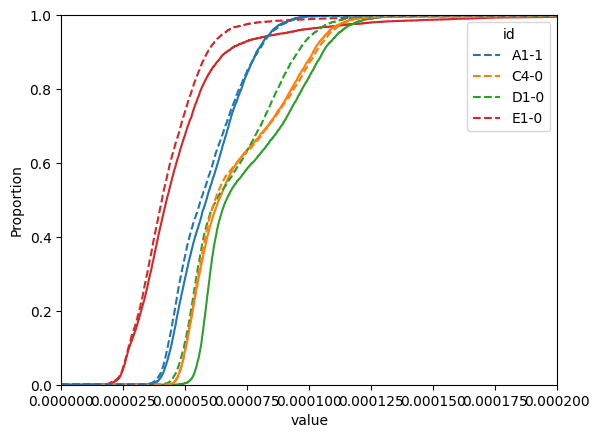

In [13]:
df_long = df.melt()
df_long[['id','condition']] = df_long.variable.str.split('_',expand=True)
sns.ecdfplot(df_long[df_long.condition == 'Vehicle'],x='value',hue='id',linestyle='-')
sns.ecdfplot(df_long[df_long.condition == 'PF'],x='value',hue='id',linestyle='--')
plt.xlim([0,.0002])

(0.0, 2.0)

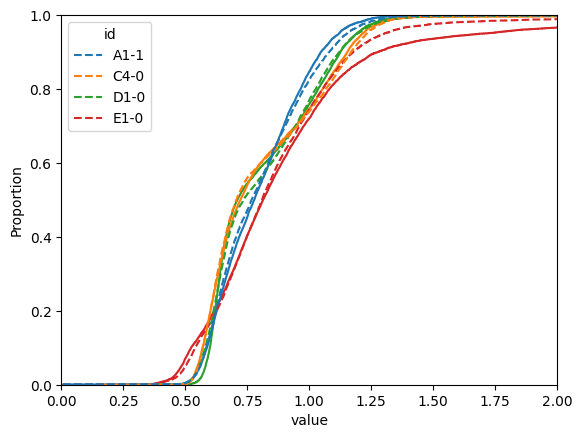

In [17]:
df_long = df.melt()
df_long[['id','condition']] = df_long.variable.str.split('_',expand=True)
sns.ecdfplot(df_long[df_long.condition == 'Vehicle'],x='value',hue='id',linestyle='-')
sns.ecdfplot(df_long[df_long.condition == 'PF'],x='value',hue='id',linestyle='--')
plt.xlim([0,2])